# Classificação de objetos (CIFAR-10)


<img src="img/CLASSIFICACAO_DE_OBJETOS_01.png">

<img src="img/CLASSIFICACAO_DE_OBJETOS_02.png">

- Base de dados: https://www.cs.toronto.edu/~kriz/cifar.html


# Etapa 1: Importação das bibliotecas

In [1]:
#%tensorflow_version 2.x
import numpy as np
import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ricar\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1

'2.3.0'

# Etapa 2: Carregamento da base de dados

In [2]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

# Etapa 3: Visualização dos dados

[1]


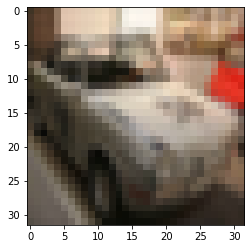

In [7]:
i = 302
plt.imshow(X_train[i])
print(y_train[i])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


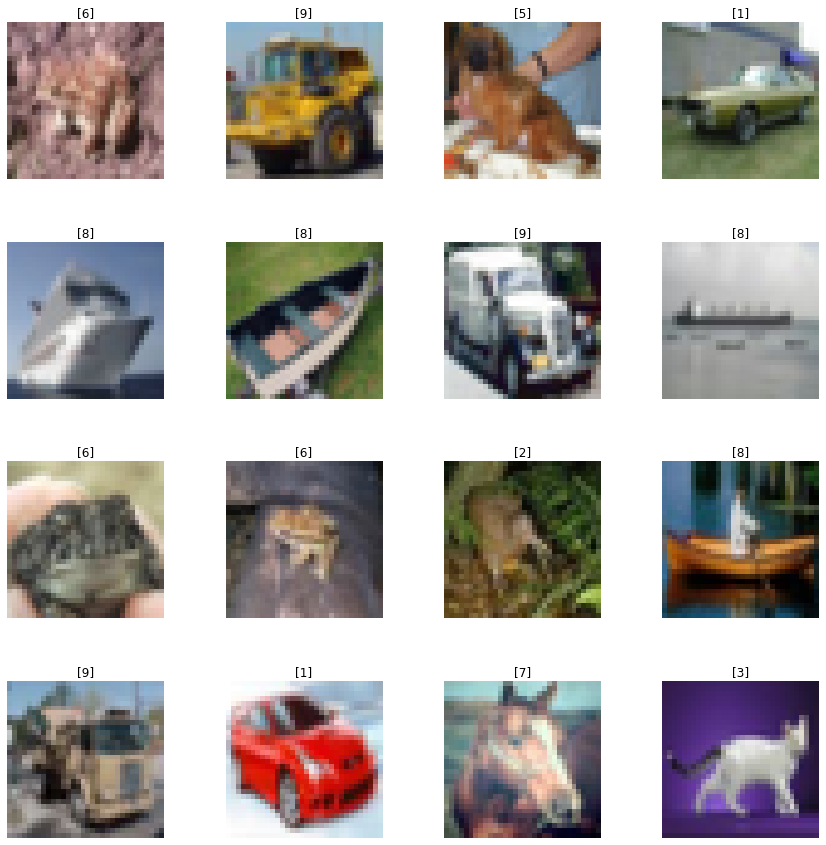

In [8]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4);

# Etapa 4: Preparação dos dados

In [9]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
numero_categorias = 10

In [13]:
y_train = tf.keras.utils.to_categorical(y_train, numero_categorias)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [16]:
y_test = tf.keras.utils.to_categorical(y_test, numero_categorias)

In [17]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [18]:
X_train = X_train/255
X_test = X_test/255

In [19]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [20]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
input_shape = X_train.shape[1:]

In [22]:
input_shape

(32, 32, 3)

In [23]:
y_train.shape

(50000, 10)

# Etapa 5: Construção e treinamento do modelo

In [24]:
cnn = tf.keras.Sequential()

# 32 filtros e kernel 3x3
# camada de convolução
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape = (32,32,3))) 
# camada de convolução
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'))
# camada de maxpooling
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

# camada de convolução
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'))
# camada de convolução
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'))
# camada de maxpooling
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

# transforma de matriz para vetor para que possamos passar para a rede neural densa
# Se olharmos o resultado terá flatten (Flatten)            (None, 1600)              0         
# Mas 1600 é maior que 1024=32*32, mas temos imagens coloridas o que fica 32*32*3=3072
# Significa que dos 3072 pixels obtivemos apenas 1600 
cnn.add(tf.keras.layers.Flatten())

# Primeira camada oculta com 1024 neurônios
cnn.add(tf.keras.layers.Dense(units=1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

# Segunda camada oculta com 1024 neurônios
cnn.add(tf.keras.layers.Dense(units=1024, activation = 'relu'))

# Camada de saída com 10 neurônios
cnn.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [25]:
# decay irá mudar o valor learning_rate(taxa de aprendizagem) conforme vai avançando nas épocas
# A taxa de aprendizagem vai indicar a velocidade que o algoritmo vai chegar no mínimo global
# Com o atributo decay começa com a learning rate mais alta e a cada época vai diminuindo um pouco a taxa de aprendizagem
# para que no momento que vai aproximando do objetivo ele não passe do mínimo global
# A cada época vai multiplicando o valor da taxa de aprendizagem pelo valor de decay e assim diminuindo o valor da learning rate

# categorical_crossentropy pois está no formato One Hot Encoder
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay = 1e-6), # 0.0000006
            loss ='categorical_crossentropy', metrics =['accuracy'])

In [26]:
epocas = 5 # epochs = 3
history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epocas)

Epoch 1/5
98/98 [==============================] - 98s 1s/step - loss: 2.1115 - accuracy: 0.2113
Epoch 2/5
98/98 [==============================] - 65s 666ms/step - loss: 1.8831 - accuracy: 0.3141
Epoch 3/5
98/98 [==============================] - 68s 692ms/step - loss: 1.7817 - accuracy: 0.3560
Epoch 4/5
98/98 [==============================] - 67s 684ms/step - loss: 1.7068 - accuracy: 0.3823
Epoch 5/5
98/98 [==============================] - 94s 960ms/step - loss: 1.6511 - accuracy: 0.4005


# Etapa 6: Avaliação do modelo

In [27]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 11s 34ms/step - loss: 1.5890 - accuracy: 0.42060s - loss: 1.5890 - accu
Test Accuracy: 0.4205999970436096


In [28]:
predicted_classes = cnn.predict_classes(X_test) 
predicted_classes

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([6, 8, 1, ..., 7, 6, 7], dtype=int64)

In [29]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [30]:
y_test = y_test.argmax(1)

In [31]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

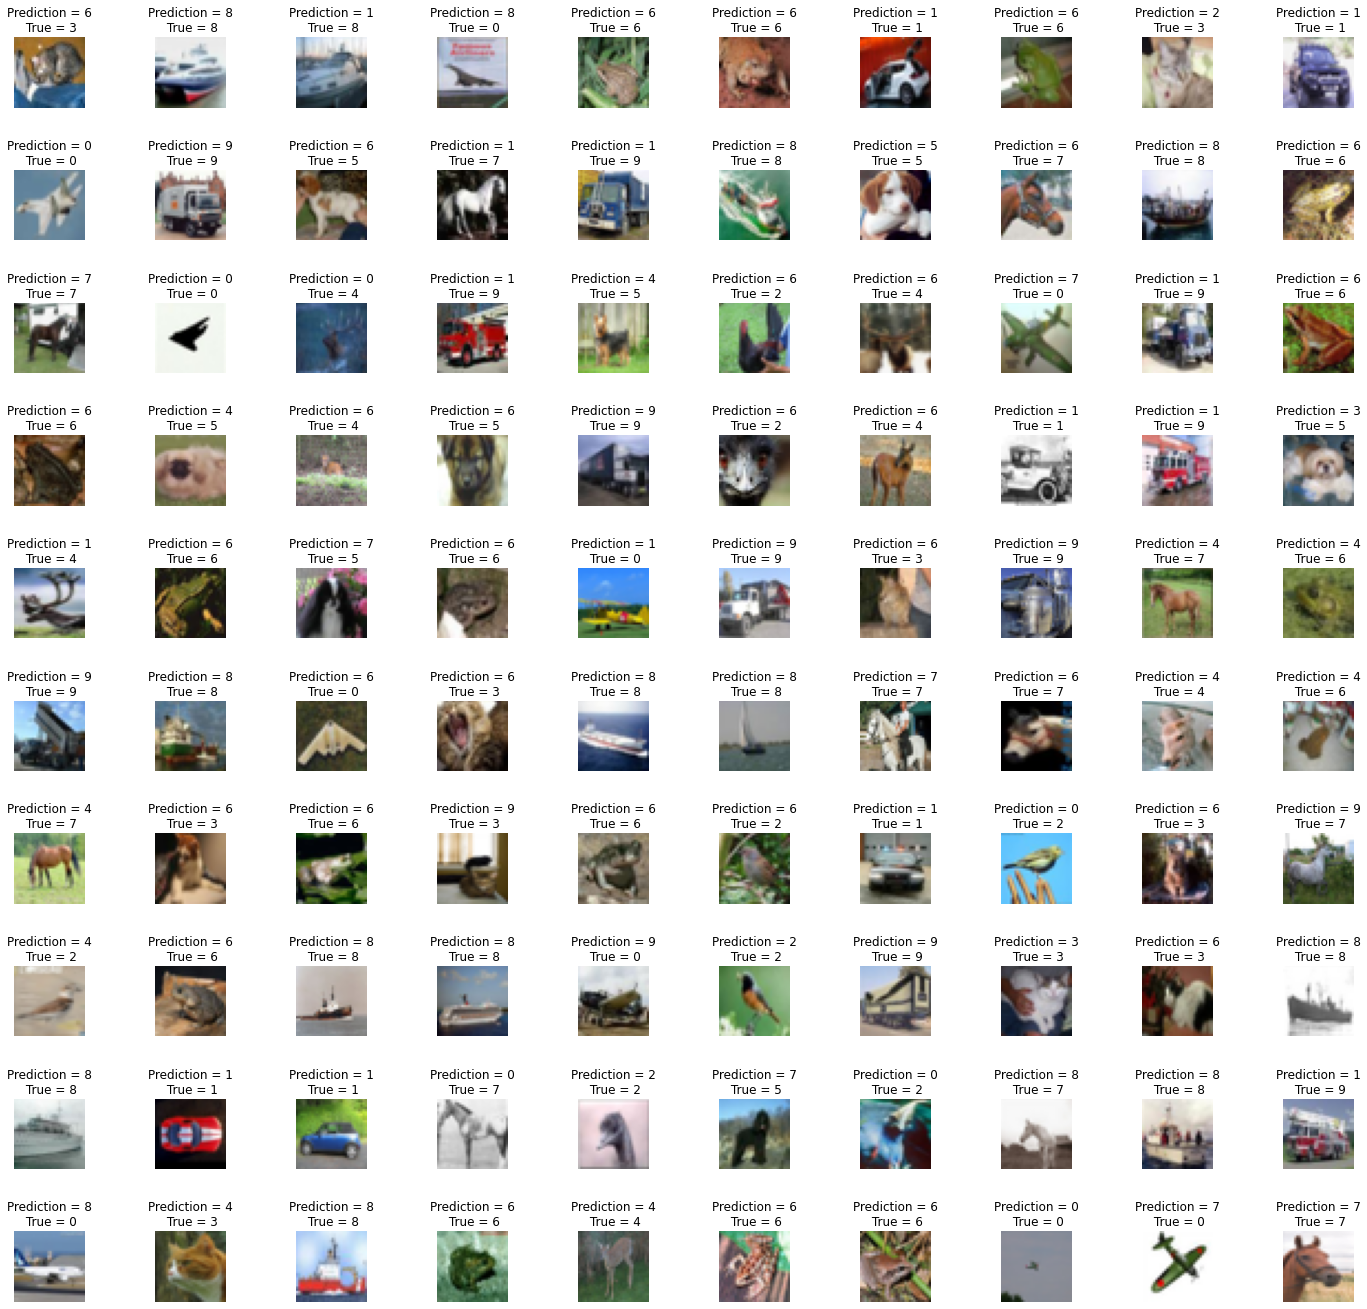

In [32]:
L = 10
W = 10
fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

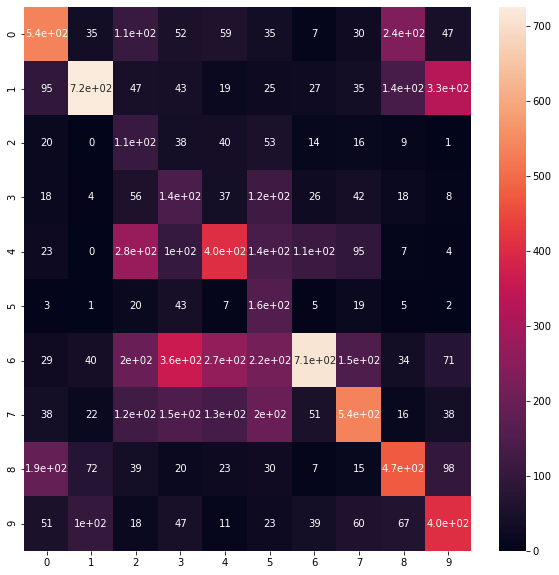

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predicted_classes, y_test)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [34]:
cm

array([[536,  35, 110,  52,  59,  35,   7,  30, 235,  47],
       [ 95, 725,  47,  43,  19,  25,  27,  35, 136, 326],
       [ 20,   0, 110,  38,  40,  53,  14,  16,   9,   1],
       [ 18,   4,  56, 144,  37, 121,  26,  42,  18,   8],
       [ 23,   0, 279, 103, 405, 140, 111,  95,   7,   4],
       [  3,   1,  20,  43,   7, 157,   5,  19,   5,   2],
       [ 29,  40, 198, 361, 267, 218, 713, 150,  34,  71],
       [ 38,  22, 123, 149, 132, 198,  51, 538,  16,  38],
       [187,  72,  39,  20,  23,  30,   7,  15, 473,  98],
       [ 51, 101,  18,  47,  11,  23,  39,  60,  67, 405]], dtype=int64)